### This notebook covers:
* datetime foundation in python and numpy
* pandas TimeStamp and DatetimeIndex
* up and down sampling with resample() and asfreq()
* interpolation and aggregation
* rolling windows and moving averages

### Revision:
* Introduction to date, time and datetime class of datetime module
* Parsing string to get date object:
    - datetime.strptime(string, format)
    - dateutil.parser.parse(string)
* Getting a string from date:
    - dt.strftime(format)
* Performant datetime with numpy:
    - np.datetime64('2020-03-21')
    - np.datetime64('2020-03-21', 'D') + 10
    - np.busday_offset(dates, offsets=-10, roll='backward')
* Pandas Timestamp:
    - pd.Timestamp('2020-03-21')
    - pd.Timestamp('4/7/2023')
    - pd.to_datetime('4/7/2023', dayfirst=True)
    - pdt.quarter, pdt.days_in_month, pdt.month, pdt.day_name()
* pd.read_csv(url, parse_dates=True)  - for identifying dates column as date object
* Indexing: 
    - oil.loc['2019-07':'2019-08-15']
    - oil.loc['2019-09']
    - oil.loc['2020-04-21']
* DateTimeIndex attributes:
    - index.isocalendar().week
    - index.month, index.quarter, index.day
    - index.day_name()
    - index.is_leap_year
* Creating date ranges:
    - pd.date_range(start='5/21/2020', end='6/21/2020')
    - pd.date_range(start='5/21/2020', periods=10, freq='2W')
* DateOffset and Timedelta:
    - pdt + pd.DateOffset(days=3, minutes=30, nanoseconds=2200)
    - pdt - pd.Timedelta(days=3, minutes=30)
    - DateOffset is calendar aware about Daylight saving time
* resampling() and interpolate():
    - Downsampling: from more date points to less data points
        - df.resample('M').agg(['mean','std'])
        - df.resample('Y').mean()
    - Upsampling: from less data points to more data points
        - df.resample('8H').mean().interpolate(method='linear')
* asfreq():
    - df.asfreq('10D', method='ffill')
    - df.asfreq('M', fill_value=12)
* rolling():
    - df.rolling(50, win_type='blackman')

In [97]:
import pandas as pd
import numpy as np
pd.__version__

'1.4.2'

### Python datetime module

In [98]:
# agenda:
# - what and why of datetime module
# - date class
# - time class
# - datetime class

In [99]:
from datetime import date, time, datetime

In [100]:
a_date = date(2019, 2, 24)

In [101]:
a_date

datetime.date(2019, 2, 24)

In [102]:
# to easily manipulate dates, date/time/datetime objects are used instead of string.

In [103]:
a_date.day, a_date.month, a_date.year

(24, 2, 2019)

In [104]:
a_time = time(15, 30)

In [105]:
a_time

datetime.time(15, 30)

In [106]:
a_time.hour, a_time.second, a_time.minute, a_time.microsecond

(15, 0, 30, 0)

In [107]:
a_datetime = datetime(2024, 10, 20, 15, 20, 30)

In [108]:
a_datetime

datetime.datetime(2024, 10, 20, 15, 20, 30)

In [109]:
a_datetime.day, a_datetime.month, a_datetime.year, a_datetime.hour, a_datetime.minute, a_datetime.second

(20, 10, 2024, 15, 20, 30)

In [110]:
datetime.now()

datetime.datetime(2024, 8, 26, 3, 30, 8, 587824)

In [111]:
date.today()

datetime.date(2024, 8, 26)

In [112]:
print(a_datetime)

2024-10-20 15:20:30


### Parsing dates from text

In [113]:
# strptime --> string parse time

In [114]:
dt_n = datetime.strptime('2019-31-10', '%Y-%d-%m')

In [115]:
dt_n

datetime.datetime(2019, 10, 31, 0, 0)

In [116]:
dt_n.isoformat()

'2019-10-31T00:00:00'

In [117]:
# january 20 2090 4pm
datetime.strptime('January 20 2090 4pm', '%B %d %Y %I%p')

datetime.datetime(2090, 1, 20, 16, 0)

### dateutil

In [118]:
!pip show python-dateutil

Name: python-dateutil
Version: 2.8.2
Summary: Extensions to the standard Python datetime module
Home-page: https://github.com/dateutil/dateutil
Author: Gustavo Niemeyer
Author-email: gustavo@niemeyer.net
License: Dual License
Location: c:\users\sonig\anaconda3\lib\site-packages
Requires: six
Required-by: pandas, matplotlib, jupyter-client, datashape, conda-repo-cli, botocore, arrow, anaconda-client


In [119]:
from dateutil import parser

In [120]:
parser.parse('Jan 21st 2019')

datetime.datetime(2019, 1, 21, 0, 0)

In [121]:
parser.parse('17 April, 2058 4pm 20 minutes 17')

datetime.datetime(2058, 4, 17, 16, 20, 17)

### From datetime to String

In [122]:
# strftime

In [123]:
dt = datetime.now()
dt

datetime.datetime(2024, 8, 26, 3, 30, 13, 876818)

In [124]:
dt.strftime('%Y')

'2024'

In [125]:
dt.strftime('Year: %Y; Month: %m; Day: %d')

'Year: 2024; Month: 08; Day: 26'

In [126]:
dt.strftime('%c')

'Mon Aug 26 03:30:13 2024'

In [127]:
'My date is {:%c}'.format(dt)

'My date is Mon Aug 26 03:30:13 2024'

### Performant datetime with numpy

In [128]:
np.datetime64('2020-02-13')

numpy.datetime64('2020-02-13')

In [129]:
n = np.datetime64('2020-02-13')
n+10   # adds to date

numpy.datetime64('2020-02-23')

In [130]:
b = np.datetime64(datetime.now())
b+10

numpy.datetime64('2024-08-26T03:30:14.017778')

In [131]:
b+20   # adds to microsecond

numpy.datetime64('2024-08-26T03:30:14.017788')

In [132]:
np.datetime64(b,'D') + 10

numpy.datetime64('2024-09-05')

In [133]:
# Efficient vectorized operations on collection of dates

In [134]:
dates = np.array(['2024-02-25',
         '2024-04-30',
         '2024-06-15'],dtype=np.datetime64)

In [135]:
dates

array(['2024-02-25', '2024-04-30', '2024-06-15'], dtype='datetime64[D]')

In [136]:
dates-10

array(['2024-02-15', '2024-04-20', '2024-06-05'], dtype='datetime64[D]')

In [137]:
np.busday_offset(dates, offsets=-10, roll='backward')  # if final date falls on weekend, you want to show backward/forward date

array(['2024-02-09', '2024-04-16', '2024-05-31'], dtype='datetime64[D]')

### The pandas TimeStamp

In [138]:
# pandas timestamp = python datetime + np datetime64

In [139]:
pd.Timestamp('4th July, 1776')

Timestamp('1776-07-04 00:00:00')

In [140]:
pd.Timestamp('03-31-2021')

Timestamp('2021-03-31 00:00:00')

In [141]:
pd.Timestamp('21/4/2020')

Timestamp('2020-04-21 00:00:00')

In [142]:
pd.to_datetime('4/7/2020', dayfirst=True), pd.Timestamp('4/7/2020')

(Timestamp('2020-07-04 00:00:00'), Timestamp('2020-04-07 00:00:00'))

In [143]:
pdt = pd.to_datetime('4/7/2020', dayfirst=True)
pdt.day_name()

'Saturday'

In [144]:
pdt.days_in_month

31

In [145]:
pdt.quarter

3

### Our Dataset: Brent prices

In [146]:
oil_url = 'https://andybek.com/pandas-oil'

In [147]:
oil = pd.read_csv(oil_url)

In [148]:
oil

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77
...,...,...
5011,24-Sep-19,64.13
5012,25-Sep-19,62.41
5013,26-Sep-19,62.08
5014,27-Sep-19,62.48


In [149]:
oil.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 362.6 KB


In [150]:
oil.Date = oil.Date.astype(np.datetime64)

In [151]:
oil.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5016 non-null   datetime64[ns]
 1   Price   5016 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.5 KB


In [152]:
oil.set_index('Date', inplace=True)
oil

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [153]:
oil.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [154]:
pd.to_datetime(['2000-02-21','2000-03-31'])

DatetimeIndex(['2000-02-21', '2000-03-31'], dtype='datetime64[ns]', freq=None)

### read_csv() with parse_dates

In [318]:
pd.read_csv(oil_url, index_col=0, parse_dates=True).index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [156]:
pd.read_csv(oil_url, index_col=0, parse_dates=True).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5016 entries, 2000-01-04 to 2019-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5016 non-null   float64
dtypes: float64(1)
memory usage: 78.4 KB


In [157]:
# if poor data quality, this may not be best option

### Indexing dates

In [158]:
oil.loc['2017-01-31']

Price    55.25
Name: 2017-01-31 00:00:00, dtype: float64

In [159]:
oil.loc['2017-01-25':'2017-01-31']

,Price
Date,
2017-01-25,54.34
2017-01-26,55.89
2017-01-27,54.80
2017-01-30,54.77
2017-01-31,55.25


In [160]:
oil.loc['2017-01']  # oil.loc['2017-01-01':'2017-01-31']

,Price
Date,
2017-01-03,55.05
2017-01-04,54.57
2017-01-05,54.99
2017-01-06,55.90
2017-01-09,54.39
2017-01-10,53.20
2017-01-11,53.61
2017-01-12,54.51
2017-01-13,54.37


In [161]:
# july 2019 to mid august 2019
oil.loc['2019-07':'2019-08-15']

,Price
Date,
2019-07-01,65.10
2019-07-02,62.72
2019-07-03,63.53
2019-07-04,63.62
2019-07-05,64.23
2019-07-08,64.89
2019-07-09,64.30
2019-07-10,66.41
2019-07-11,67.64


### Challenge 1

In [162]:
# 1. form oil df, create a shorter df which container dates from 1 dec 2015 to 31 march 2016
oil.loc['2015-12-01':'2016-03-31']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


In [163]:
# 2. Repeat the above, but this time using partial string indexing instead of specifying full dates. 
# What was the standard deviation of prices during this period?
oil.loc['2015-12':'2016-3'].std()
oil.loc['dec 2015':'march 2016'].std()

Price    3.990123
dtype: float64

In [164]:
# 3. was the mean price from feb 2018 greater/lesser than median price form march 2017?
oil.loc['2018-02'].mean(), oil.loc['2017-03'].median()

(Price    65.3175
 dtype: float64,
 Price    50.65
 dtype: float64)

### DateTimeIndex Attribute Accessors

In [165]:
oil.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [166]:
oil.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=5016)

In [167]:
oil.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Date', length=5016)

In [168]:
oil.index.isocalendar().week

Date
2000-01-04     1
2000-01-05     1
2000-01-06     1
2000-01-07     1
2000-01-10     2
              ..
2019-09-24    39
2019-09-25    39
2019-09-26    39
2019-09-27    39
2019-09-30    40
Name: week, Length: 5016, dtype: UInt32

In [169]:
oil.index.weekofyear

C:\Users\sonig\AppData\Local\Temp\ipykernel_18160\2081146448.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  oil.index.weekofyear


Int64Index([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
            ...
            38, 38, 38, 38, 39, 39, 39, 39, 39, 40],
           dtype='int64', name='Date', length=5016)

In [170]:
oil.index.day

Int64Index([ 4,  5,  6,  7, 10, 11, 12, 13, 14, 17,
            ...
            17, 18, 19, 20, 23, 24, 25, 26, 27, 30],
           dtype='int64', name='Date', length=5016)

In [171]:
oil.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=5016)

In [172]:
# Q. what day has registed lowest oil price, on average in past 19 year?

In [173]:
oil['Dayname'] = oil.index.day_name()

In [174]:
oil

,Price,Dayname
Date,,
2000-01-04,23.95,Tuesday
2000-01-05,23.72,Wednesday
2000-01-06,23.55,Thursday
2000-01-07,23.35,Friday
2000-01-10,22.77,Monday
...,...,...
2019-09-24,64.13,Tuesday
2019-09-25,62.41,Wednesday
2019-09-26,62.08,Thursday


In [175]:
oil.groupby('Dayname').mean().sort_values(by='Price', ascending=False)

,Price
Dayname,
Thursday,64.581943
Wednesday,64.495593
Tuesday,64.493895
Friday,64.317988
Monday,63.875348


In [176]:
oil.drop(columns='Dayname', inplace=True)

In [177]:
oil

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [178]:
# bool mask with datetimeindex attribute

In [179]:
# Q. find the average price in all leap year feb.

def is_leap(y):
    if y%4==0:
        if y%100==0:
            if y%400==0:
                return True
            return False
        return True
    return False
    
mask = [is_leap(x) for x in oil.index.year]
oil.loc[mask & (oil.index.month==2)].mean()

Price    60.696634
dtype: float64

In [180]:
oil.loc[(oil.index.is_leap_year==True) & (oil.index.month==2)].mean()

Price    60.696634
dtype: float64

### Creating Date Ranges

In [181]:
oil.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [182]:
pd.date_range(start='18 Jan 2020', end='20 june 2020')

DatetimeIndex(['2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27',
               ...
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', length=155, freq='D')

In [183]:
pd.date_range(start='5/21/2020', periods=10)

DatetimeIndex(['2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30'],
              dtype='datetime64[ns]', freq='D')

In [184]:
pd.date_range(start='5/21/2020', periods=10, freq='M')

DatetimeIndex(['2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28'],
              dtype='datetime64[ns]', freq='M')

In [185]:
pd.date_range(start='5/21/2020', periods=10, freq='2W')

DatetimeIndex(['2020-05-24', '2020-06-07', '2020-06-21', '2020-07-05',
               '2020-07-19', '2020-08-02', '2020-08-16', '2020-08-30',
               '2020-09-13', '2020-09-27'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [186]:
dti = pd.date_range(start='5/21/2020', periods=20, freq='M')

In [187]:
pd.DataFrame(index=dti, data=np.random.randint(100, size=(20,4)), columns=list('abcd'))

,a,b,c,d
2020-05-31,0,14,5,64
2020-06-30,24,40,49,24
2020-07-31,85,89,6,3
2020-08-31,63,89,27,96
2020-09-30,52,24,87,23
2020-10-31,9,81,34,64
2020-11-30,3,99,95,14
2020-12-31,4,21,75,82
2021-01-31,59,11,46,12
2021-02-28,83,34,86,38


### Shifting dates with pd.DateOffset

In [188]:
dob = pd.Timestamp('2020-03-09')

In [189]:
dob

Timestamp('2020-03-09 00:00:00')

In [190]:
dob - 10

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [191]:
pd.DateOffset(days=10)

<DateOffset: days=10>

In [192]:
dob - pd.DateOffset(days=10)

Timestamp('2020-02-28 00:00:00')

In [193]:
pd.DateOffset(days=10, minutes=30, nanoseconds=10)

<DateOffset: days=10, minutes=30, nanoseconds=10>

In [196]:
pd.DateOffset(years=4)

<DateOffset: years=4>

In [197]:
dob +pd.DateOffset(years=4)  

Timestamp('2024-03-09 00:00:00')

In [198]:
oil.index = oil.index + pd.DateOffset(hours=18)
oil

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


### Timedeltas and Absolute Time

In [199]:
# Timedelta Class

In [200]:
pd.Timedelta(days=3, hours=20)

Timedelta('3 days 20:00:00')

In [201]:
pd.DateOffset(days=3, hours=20)

<DateOffset: days=3, hours=20>

In [204]:
ts = oil.iloc[0].name
ts

Timestamp('2000-01-04 18:00:00')

In [205]:
ts + pd.Timedelta(days=3, hours=6)

Timestamp('2000-01-08 00:00:00')

In [206]:
ts + pd.DateOffset(days=3, hours=6)

Timestamp('2000-01-08 00:00:00')

In [208]:
# dateoffset - calendar aware (day could be 23-25 hours) # based on Daylight saving
# timedelta - day = 24 hours

In [209]:
dat = pd.Timestamp('14 march 2021', tz='US/Eastern')

In [210]:
dat

Timestamp('2021-03-14 00:00:00-0500', tz='US/Eastern')

In [211]:
dat + pd.DateOffset(days=1)

Timestamp('2021-03-15 00:00:00-0400', tz='US/Eastern')

In [212]:
dat + pd.Timedelta(days=1)

Timestamp('2021-03-15 01:00:00-0400', tz='US/Eastern')

### Resampling Timeseries

In [213]:
oil.resample('M')

In [214]:
# D -> M
# Many data points -> fewer and far between

In [223]:
oil.resample('M').median()  # down sampling

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


<AxesSubplot:xlabel='Date'>

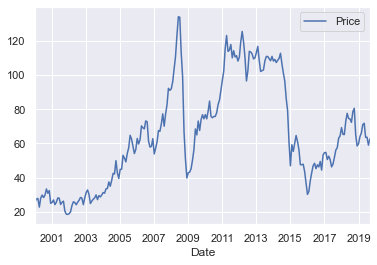

In [218]:
oil.resample('M').median().plot()

In [217]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Date'>

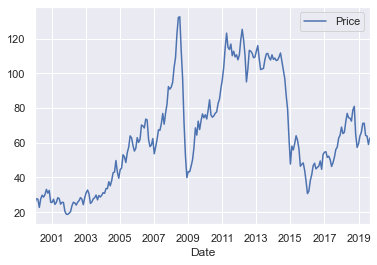

In [219]:
oil.resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

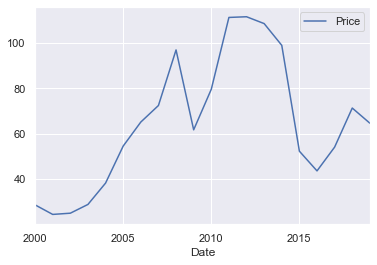

In [220]:
oil.resample('Y').mean().plot()

In [221]:
oil.resample('Y').mean().size

20

<AxesSubplot:xlabel='Date'>

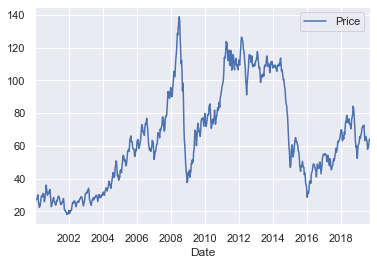

In [222]:
oil.resample('10D').mean().plot()

### Upsampling and Interpolation

In [225]:
# upsampling: 'D' -> 'H'
# few -> many observations

In [255]:
oil.resample('8H').mean()

,Price
Date,
2000-01-04 16:00:00,23.95
2000-01-05 00:00:00,NaN
2000-01-05 08:00:00,NaN
2000-01-05 16:00:00,23.72
2000-01-06 00:00:00,NaN
...,...
2019-09-29 08:00:00,NaN
2019-09-29 16:00:00,NaN
2019-09-30 00:00:00,NaN


In [253]:
oil.resample('8H')

In [227]:
# linear interpolation

In [229]:
# 23.72 NaN NaN 23.95
diff = (23.95-23.72)/3
diff

0.07666666666666681

In [262]:
N1 = 23.72 + diff
N2 = N1 + diff
N2 + diff
print(N1,N2)

23.796666666666667 23.873333333333335


In [261]:
oil.resample("8H").mean().interpolate(method="linear")

,Price
Date,
2000-01-04 16:00:00,23.950000
2000-01-05 00:00:00,23.873333
2000-01-05 08:00:00,23.796667
2000-01-05 16:00:00,23.720000
2000-01-06 00:00:00,23.663333
...,...
2019-09-29 08:00:00,61.652222
2019-09-29 16:00:00,61.486667
2019-09-30 00:00:00,61.321111


In [263]:
oil.resample('8H').mean().interpolate(method='spline', order=3)

,Price
Date,
2000-01-04 16:00:00,23.950000
2000-01-05 00:00:00,23.013531
2000-01-05 08:00:00,23.117453
2000-01-05 16:00:00,23.720000
2000-01-06 00:00:00,23.319619
...,...
2019-09-29 08:00:00,61.240570
2019-09-29 16:00:00,61.195778
2019-09-30 00:00:00,61.176797


In [274]:
oil.resample('8H').mean().interpolate(method='akima')

,Price
Date,
2000-01-04 16:00:00,23.950000
2000-01-05 00:00:00,23.865926
2000-01-05 08:00:00,23.788519
2000-01-05 16:00:00,23.720000
2000-01-06 00:00:00,23.662370
...,...
2019-09-29 08:00:00,61.999444
2019-09-29 16:00:00,61.795764
2019-09-30 00:00:00,61.558873


### asfreq()

In [275]:
oil.asfreq('10D')

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-14 18:00:00,25.50
2000-01-24 18:00:00,27.02
2000-02-03 18:00:00,27.60
2000-02-13 18:00:00,NaN
...,...
2019-08-12 18:00:00,57.13
2019-08-22 18:00:00,59.81
2019-09-01 18:00:00,NaN


In [277]:
'2019-09-21' in oil.index, '2020-02-21' in oil.index

(True, False)

In [278]:
pd.Timestamp('2020-09-21').day_name()

'Monday'

In [280]:
oil.asfreq('10D', method='ffill') # bfill

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-14 18:00:00,25.50
2000-01-24 18:00:00,27.02
2000-02-03 18:00:00,27.60
2000-02-13 18:00:00,27.82
...,...
2019-08-12 18:00:00,57.13
2019-08-22 18:00:00,59.81
2019-09-01 18:00:00,61.04


In [281]:
oil.asfreq('10D', fill_value=12)

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-14 18:00:00,25.50
2000-01-24 18:00:00,27.02
2000-02-03 18:00:00,27.60
2000-02-13 18:00:00,12.00
...,...
2019-08-12 18:00:00,57.13
2019-08-22 18:00:00,59.81
2019-09-01 18:00:00,12.00


In [282]:
oil.asfreq('M',method='ffill')

,Price
Date,
2000-01-31 18:00:00,27.08
2000-02-29 18:00:00,29.01
2000-03-31 18:00:00,23.98
2000-04-30 18:00:00,23.79
2000-05-31 18:00:00,29.64
...,...
2019-05-31 18:00:00,66.78
2019-06-30 18:00:00,67.52
2019-07-31 18:00:00,64.07


In [284]:
oil.resample('M').median()

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


In [285]:
# -> asfreq() - merely selects the specific data from series
# -> resample() - gives resampler object on which we can apply aggregation function.

### Rolling Windows

In [286]:
# window size = 3
# agg function = mean

In [287]:
oil

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [289]:
(oil.iloc[0] + oil.iloc[1] + oil.iloc[2])/3

Price    23.74
dtype: float64

In [290]:
oil.rolling(3).mean()

,Price
Date,
2000-01-04 18:00:00,NaN
2000-01-05 18:00:00,NaN
2000-01-06 18:00:00,23.740000
2000-01-07 18:00:00,23.540000
2000-01-10 18:00:00,23.223333
...,...
2019-09-24 18:00:00,64.673333
2019-09-25 18:00:00,63.733333
2019-09-26 18:00:00,62.873333


In [291]:
oil.rolling(3)

Rolling [window=3,center=False,axis=0,method=single]

In [292]:
# visulizing moving averages
from matplotlib import pyplot as plt

Text(0, 0.5, 'Brent Price(USD)')

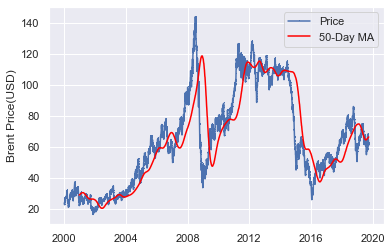

In [297]:
fig, ax = plt.subplots()
ax.plot(oil, marker=',', label='Price')
ax.plot(oil.rolling(250, win_type='blackman').mean(), color='red', label='50-Day MA')

ax.legend();
ax.set_ylabel('Brent Price(USD)')

### Challenge

In [313]:
# 1. add a new column(called Quarter) to oil df that contains date's respective calendar quarter
oil['Quarter'] = oil.index.quarter
oil

,Price,Quarter
Date,,
2000-01-04 18:00:00,23.95,1
2000-01-05 18:00:00,23.72,1
2000-01-06 18:00:00,23.55,1
2000-01-07 18:00:00,23.35,1
2000-01-10 18:00:00,22.77,1
...,...,...
2019-09-24 18:00:00,64.13,3
2019-09-25 18:00:00,62.41,3
2019-09-26 18:00:00,62.08,3


In [314]:
# 2. calculate average price and std dev for each quarter of the year 2014
oil.loc['2014'].groupby('Quarter').agg(['mean', 'std'])

Price           
               mean        std
Quarter                       
1        108.141935   1.280641
2        109.694063   2.406442
3        101.899844   4.364868
4         76.429219  11.410171

In [316]:
# 3. Reproduce price average and std dev, but this time using resample() and w/o relying on Quarter column
oil.drop(columns='Quarter', inplace=True)
oil.loc['2014'].resample('Q').agg(['mean','std' ])

Price           
                  mean        std
Date                             
2014-03-31  108.141935   1.280641
2014-06-30  109.694063   2.406442
2014-09-30  101.899844   4.364868
2014-12-31   76.429219  11.410171